# Exploraciòn grafica de variables 

In [1]:
#importamos las librerias necesarias


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# configuration pandas see all columns
pd.set_option('display.max_rows', 350)
pd.set_option('display.max_columns', 350)
pd.set_option('display.width', 1200)

# suppress scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#La limpieza de datos se realizò en tres grupos, unimos para obtener un unico df  

subset3 = pd.read_csv('subset3.csv')
subset2 = pd.read_csv("\home\juanfi\data_2_limpio.csv")
subset1 = pd.read_csv('data_1_f.csv')

full2 = subset2.merge(subset3, on='SUSCRIBER_KEY')
full3 = full2.merge(subset1, on='SUSCRIBER_KEY')

del full3["Unnamed: 0"]
full3.head()

,SUSCRIBER_KEY,TRD_IM_M1,TRD_IM_M2,TRD_IM_M3,TRS_OFFNET_SMS_M1,TRS_OFFNET_SMS_M2,TRS_OFFNET_SMS_M3,TRV_ONNET_DUR_M1,TRV_ONNET_DUR_M2,TRV_ONNET_DUR_M3,TRV_OFFNET_DUR_M1,TRV_OFFNET_DUR_M2,TRV_OFFNET_DUR_M3,TRV_LCL_DUR_M1,TRV_LCL_DUR_M2,TRV_LCL_DUR_M3,PACK_DATA_Q_X1,PACK_DATA_Q_X2,PACK_DATA_Q_X3,PACK_DATA_AMT_X1,PACK_DATA_AMT_X2,PACK_DATA_AMT_X3,PACK_VOICE_Q_X1,PACK_VOICE_Q_X2,PACK_VOICE_Q_X3,PACK_DATA_Q_W1,PACK_DATA_Q_W2,PACK_DATA_Q_W3,PACK_DATA_Q_W4,PACK_DATA_Q_W5,PACK_DATA_Q_W6,PACK_DATA_Q_W7,PACK_DATA_Q_W8,PACK_DATA_Q_W9,PACK_DATA_Q_W10,PACK_DATA_Q_W11,PACK_DATA_Q_W12,PACK_DATA_AMT_W1,PACK_DATA_AMT_W2,PACK_DATA_AMT_W3,PACK_DATA_AMT_W4,PACK_DATA_AMT_W5,PACK_DATA_AMT_W6,PACK_DATA_AMT_W7,PACK_DATA_AMT_W8,PACK_DATA_AMT_W9,PACK_DATA_AMT_W10,PACK_DATA_AMT_W11,PACK_DATA_AMT_W12,Target_x,PACK_VOICE_Q_W1,PACK_VOICE_Q_W2,PACK_VOICE_Q_W3,PACK_VOICE_Q_W4,PACK_VOICE_Q_W5,PACK_VOICE_Q_W6,PACK_VOICE_Q_W7,PACK_VOICE_Q_W8,PACK_VOICE_Q_W9,PACK_VOICE_Q_W10,PACK_VOICE_Q_W11,PACK_VOICE_Q_W12,PACK_VOICE_AMT_W1,PACK_VOICE_AMT_W2,PACK_VOICE_AMT_W3,PACK_VOICE_AMT_W4,PACK_VOICE_AMT_W5,PACK_VOICE_AMT_W6,PACK_VOICE_AMT_W7,PACK_VOICE_AMT_W8,PACK_VOICE_AMT_W9,PACK_VOICE_AMT_W10,PACK_VOICE_AMT_W11,PACK_VOICE_AMT_W12,PACK_SMS_Q_W1,PACK_SMS_Q_W2,PACK_SMS_Q_W3,PACK_SMS_Q_W4,PACK_SMS_Q_W5,PACK_SMS_Q_W6,PACK_SMS_Q_W7,PACK_SMS_Q_W8,PACK_SMS_Q_W9,PACK_SMS_Q_W10,PACK_SMS_Q_W11,PACK_SMS_Q_W12,PACK_SMS_AMT_W1,PACK_SMS_AMT_W2,PACK_SMS_AMT_W3,PACK_SMS_AMT_W4,PACK_SMS_AMT_W5,PACK_SMS_AMT_W6,PACK_SMS_AMT_W7,PACK_SMS_AMT_W8,PACK_SMS_AMT_W9,PACK_SMS_AMT_W10,PACK_SMS_AMT_W11,PACK_SMS_AMT_W12,PACK_DATA_EXP_W1,PACK_DATA_EXP_W2,PACK_DATA_EXP_W3,PACK_DATA_EXP_W4,PACK_DATA_EXP_W5,PACK_DATA_EXP_W6,PACK_DATA_EXP_W7,PACK_DATA_EXP_W8,PACK_DATA_EXP_W9,PACK_DATA_EXP_W10,PACK_DATA_EXP_W11,PACK_DATA_EXP_W12,Target_y,LAT_PROV_BTS,LON_PROV_BTS,LAT_CITY_BTS,LON_CITY_BTS,VALUE_SEGMENT,SEGMENTATION,MICROSEGMENTATION,DEVICE_MODEL_NAME,DEVICE_VENDOR_NAME,NETWORK_TECH,COMMERCIAL_ACTIVATION_DATE,TENURE_CUSTOMER,PREP_RECH_Q_EVT_X1,PREP_RECH_Q_EVT_X2,PREP_RECH_Q_EVT_X3,PREP_RECH_AMT_X1,PREP_RECH_AMT_X2,PREP_RECH_AMT_X3,PREP_RECH_Q_MON_12W,PREP_RECH_Q_TUE_12W,PREP_RECH_Q_WEN_12W,PREP_RECH_Q_THUR_12W,PREP_RECH_Q_FRI_12W,PREP_RECH_Q_SAT_12W,PREP_RECH_Q_SUN_12W,PREP_RECH_LAST_DAY_12W,PREP_RECH_NDAYS_LASTRECH_12W,PREP_RECH_CHNNL_MODE12W,PREP_RECH_Q_EVT_W1,PREP_RECH_Q_EVT_W2,PREP_RECH_Q_EVT_W3,PREP_RECH_Q_EVT_W4,PREP_RECH_Q_EVT_W5,PREP_RECH_Q_EVT_W6,PREP_RECH_Q_EVT_W7,PREP_RECH_Q_EVT_W8,PREP_RECH_Q_EVT_W9,PREP_RECH_Q_EVT_W10,PREP_RECH_Q_EVT_W11,PREP_RECH_Q_EVT_W12,PREP_RECH_AMT_W1,PREP_RECH_AMT_W2,PREP_RECH_AMT_W3,PREP_RECH_AMT_W4,PREP_RECH_AMT_W5,PREP_RECH_AMT_W6,PREP_RECH_AMT_W7,PREP_RECH_AMT_W8,PREP_RECH_AMT_W9,PREP_RECH_AMT_W10,PREP_RECH_AMT_W11,PREP_RECH_AMT_W12,TRD_M1,TRD_M2,TRD_M3,TRD_STR_M1,TRD_STR_M2,TRD_STR_M3,TRD_SN_M1,TRD_SN_M2,TRD_SN_M3
0,E_63734494_20190215,526.000,435.000,0.000,4.000,0.000,0.000,139.530,188.600,1.670,8.330,21.950,1.130,147.870,210.550,2.800,4.000,5.000,4.000,6.000,9.000,6.000,0.000,0.000,0.000,0.000,0.000,3.000,3.000,3.000,4.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,3.000,3.000,3.000,6.000,0.000,0.000,6.000,0.000,0.000,0.000,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,6.000,10.000,11.000,0.000,4.000,11.000,0.000,0.000,0.000,1,8.585,-82.388,-82.433,8.433,3,2-PD,PD1,OTROS,LG,LTE,2019-02-15,8,6,8,4,8.500,13.000,6.000,4.000,4.000,4.000,3.000,3.000,3.000,5.000,2019-08-19,22.000,"N/A,3;UGW,9",0.000,0.000,4.000,4.000,3.000,4.000,0.000,3.000,4.000,0.000,0.000,0.000,0.000,0.000,3.500,5.000,3.000,8.500,0.000,1.500,6.000,0.000,0.000,0.000,15.090,5.060,1.000,12538.000,1121.000,866.000,0.000,38.000,0.000
1,E_66977552_20190518,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.270,4.120,0.620,2.270,4.120,0.620,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,

In [3]:
# full3 es un df que no tiene la columna target incluida, la incorporamos 

data_2_target =pd.read_csv('\home\juanfi\data_2_target.csv')

full3 = pd.merge(full3, data_2_target[['Target','SUSCRIBER_KEY']], on= 'SUSCRIBER_KEY')

In [4]:
# Transformamos la variable COMMERCIAL_ACTIVATION_DATE en datetime y creamos las columnas Year
#  period y month

full3['Date'] = pd.to_datetime(full3['COMMERCIAL_ACTIVATION_DATE'])
full3['Month'] = full3['Date'].dt.month # obtenemos el numero de mes
full3['Year'] = full3['Date'].dt.year # obtenemos el año
full3['Period'] = full3['Date'].dt.to_period('M') # obtenemos el periodo, en formato año/mes
full3.sort_values('Date', inplace=True) 

In [5]:
 pd.pivot_table(data=full3,
               index=['Year'],
               columns=['Month'],
               aggfunc=['size']
              )


size                                                                                                         
Month       1        2         3         4         5         6         7        8        9        10       11        12
Year                                                                                                                   
2011       nan      nan       nan       nan       nan       nan     2.000      nan      nan      nan    1.000       nan
2012       nan      nan       nan     5.000     3.000       nan       nan      nan    7.000      nan      nan       nan
2013       nan      nan       nan       nan     2.000       nan    23.000      nan      nan      nan      nan       nan
2014       nan      nan       nan       nan       nan       nan       nan      nan      nan      nan   46.000    68.000
2015    12.000      nan    14.000       nan  2171.000 31434.000 52587.000 3055.000 1813.000 1937.000 1867.000  2695.000
2016  2153.000 2031.000  2120.000  2135.000  6324.000  3761.000  2189.000 2415.000 2484.000 2658.000 2502.000  4283.000
2017  3309.000 3078.000  3405.000  2811.000  3005.000  3559.000  3069.000 3323.000 3077.000 3585.000 3250.000  5300.000
2018  4489.000 3733.000  4847.000  4695.000  4282.000  4936.000  5554.000 5864.000 5671.000 6093.000 6321.000 10373.000
2019  9198.000 9088.000 10864.000 10893.000 12555.000  8405.000       nan      nan      nan      nan      nan       nan

In [6]:
# Eliminamos los valores previos al mes 5 del 2015 porque el registro esta interrumpido

period = pd.to_datetime('2015-05').to_period('M')
full3 = full3[full3['Period']>=period]



In [7]:
#Tambien eliminamos los valores correspondiente a al periodo 2015 mes 5,6,7 y 8 porque los 
#valores son muy superiores a los registros historicos posteriores

periodt = pd.to_datetime('2015-08').to_period('M')
periodt

full3 = full3[full3['Period']>=periodt]

In [8]:
# construimos tabla pivot para estudiar los eventos de recarga por mes, cada año,
# para los dos tipos de clientes (los que se quedan #0 y los que se van #1)

pivot_uno = pd.pivot_table(data=full3,
               index=['Year'],
               columns=['Month','Target'],
             values=['PREP_RECH_Q_EVT_X1'],
               aggfunc=['mean']
              )

pivot_uno


mean                                                                                                                                          
       PREP_RECH_Q_EVT_X1                                                                                                                                          
Month                  1           2           3           4           5           6           7           8           9           10          11          12      
Target                  0     1     0     1     0     1     0     1     0     1     0     1     0     1     0     1     0     1     0     1     0     1     0     1
Year                                                                                                                                                               
2015                  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan 5.371 2.041 5.350 1.936 5.633 1.991 5.572 1.993 5.452 2.068
2016                5.460 2.019 5.451 2.081 5.515 1.987 5.512 1.929 5.045 2.201 4.998 2.129 5.427 1.914 5.565 2.087 5.499 2.056 5.502 1.841 5.554 1.944 5.340 2.017
2017                5.472 1.915 5.437 1.940 5.519 1.976 5.466 1.978 5.651 1.999 5.458 1.925 5.531 1.883 5.541 1.930 5.503 1.892 5.593 2.018 5.503 2.081 5.311 1.913
2018                5.448 1.867 5.602 1.894 5.448 1.848 5.578 1.870 5.509 1.811 5.511 1.951 5.572 1.850 5.612 1.861 5.478 1.771 5.564 1.784 5.410 1.719 5.349 1.714
2019                5.457 1.797 5.454 1.749 5.421 1.689 5.448 1.681 5.504 1.592 5.433 1.457   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan

Text(114.0, 0.5, 'Años')

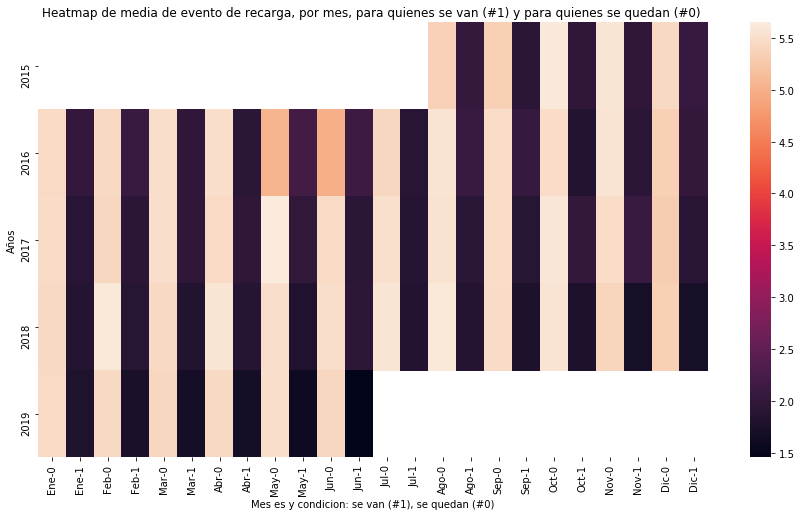

In [9]:
# Graficamos la media para los Eventos de recarga por mes, a lo largo de los años,
# para las personas que abandonan la empresa (#1) y para quienes continuan con el servicio (#0)

plt.figure(figsize=(15,8))

x_tick = ['Ene-0','Ene-1','Feb-0','Feb-1','Mar-0','Mar-1','Abr-0','Abr-1','May-0','May-1',\
        'Jun-0','Jun-1','Jul-0','Jul-1','Ago-0','Ago-1','Sep-0','Sep-1','Oct-0','Oct-1'\
         ,'Nov-0','Nov-1','Dic-0','Dic-1']
ax = sns.heatmap(data= pivot_uno, xticklabels= x_tick)


ax.set_xlabel('Mes es y condicion: se van (#1), se quedan (#0)')
ax.set_title('Heatmap de media de evento de recarga, por mes, para quienes se van (#1) y para quienes se quedan (#0) ')              
ax.set_ylabel('Años')

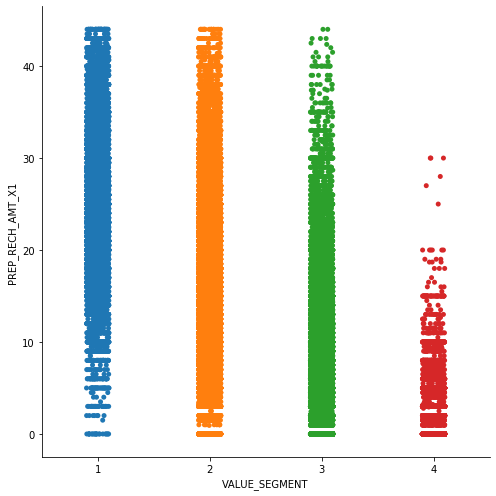

In [10]:
# Graficamos el Monto de recargas acumuladas mensuales por segmento de valor de clientes 


sns.catplot( x = "VALUE_SEGMENT" , y = 'PREP_RECH_AMT_X1' , height = 7 , data =full3)

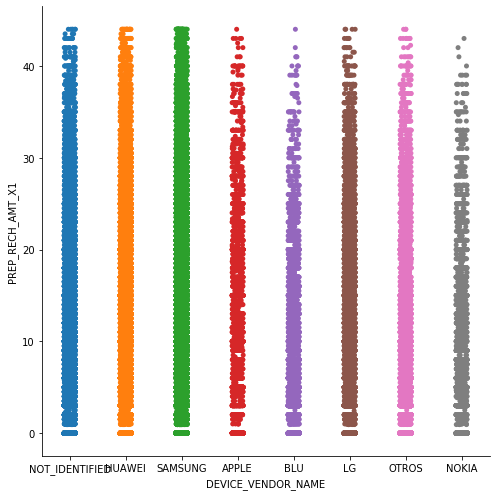

In [11]:
# Graficamos el Monto de recargas acumuladas en el mes 1 por compañia de celular

sns.catplot( x = "DEVICE_VENDOR_NAME" , y = 'PREP_RECH_AMT_X1' , height = 7 , data =full3)


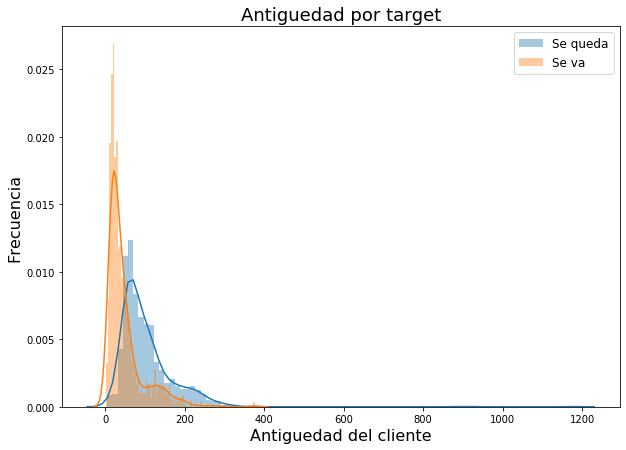

In [12]:
# Distribuciòn de clientes que se van (#1),y que se quedan (#0))
# por fecha de activaciòn de servicio 

pivot_tres = pd.pivot_table(data=full3,
               index=['COMMERCIAL_ACTIVATION_DATE'],
                columns=['Target'],
               aggfunc=['size']
              )


fig = plt.figure(figsize = (10,7))

sns.distplot(pivot_tres[('size', 0)], bins= 90, label = 'Se queda')
sns.distplot(pivot_tres[('size', 1)], bins= 90, label = 'Se va')

plt.title('Antiguedad por target', fontsize=18)
plt.xlabel('Antiguedad del cliente', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
plt.legend(prop={'size': 12})

In [13]:
pivot_tres

size     
Target                        0    1
COMMERCIAL_ACTIVATION_DATE          
2015-08-01                   97   23
2015-08-02                   48   19
2015-08-03                   76   27
2015-08-04                   60   24
2015-08-05                   77   16
...                         ...  ...
2019-06-13                  240  212
2019-06-14                  280  264
2019-06-15                  356  305
2019-06-16                  296  283
2019-06-17                  383  372

[1417 rows x 2 columns]

Text(0.5, 51.0, 'Se va #1, se queda #0')

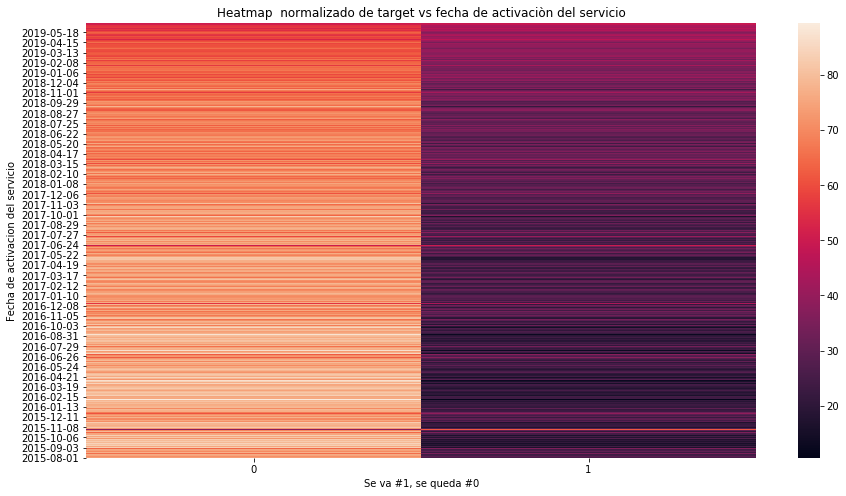

In [14]:
#Normalizamos por fecha de activaciòn para estudiar el comportamiento de los clentes 
# (si se quedan o se van), para ver si existe una tendencia de distribuciòn de casos #1
# en relacion al tiempo de pertenencia a la empresa.



pivot_tres['Count'] = pivot_tres.sum(1)
pivot_tres.columns

pivotee = (pivot_tres[('size', 0)]/pivot_tres[('Count','')])*100
pivoteee = (pivot_tres[('size', 1)]/pivot_tres[('Count','')])*100

pivote = pd.concat([pivotee, pivoteee], axis=1)
pivote

plt.figure(figsize=(15,8))
ax = sns.heatmap(data= pivote)
ax.invert_yaxis()


ax.set_ylabel('Fecha de activacion del servicio')
ax.set_title('Heatmap  normalizado de target vs fecha de activaciòn del servicio')              
ax.set_xlabel('Se va #1, se queda #0')

Text(0.5, 51.0, 'Se va #1, se queda #0')

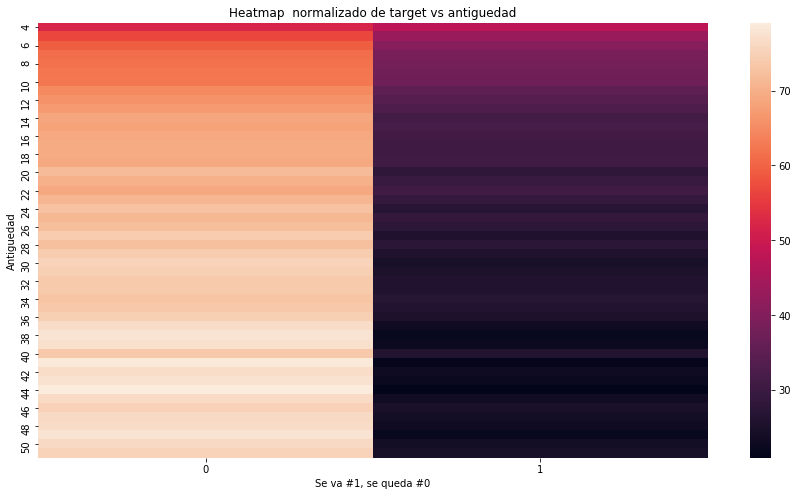

In [15]:
# El mismo analisis del caso anterior pero para la columna TENURE_CUSTOMER

pivot_tres = pd.pivot_table(data=full3,
               index=['TENURE_CUSTOMER'],
                columns=['Target'],
               aggfunc=['size']
              )



pivot_tres['Count'] = pivot_tres.sum(1)
pivot_tres.columns

pivotee = (pivot_tres[('size', 0)]/pivot_tres[('Count','')])*100
pivoteee = (pivot_tres[('size', 1)]/pivot_tres[('Count','')])*100

pivote = pd.concat([pivotee, pivoteee], axis=1)
pivote

plt.figure(figsize=(15,8))
ax = sns.heatmap(data= pivote)

ax.set_ylabel('Antiguedad')
ax.set_title('Heatmap  normalizado de target vs antiguedad')              
ax.set_xlabel('Se va #1, se queda #0')

In [379]:

# construimos tabla pivot para estudiar ocurrencia de clientes que se van y que se queda  
#en relaciòn a su antiguedad en el servicio y al tipo de red

pivot_3=pd.pivot_table(data=full3,
            index=['TENURE_CUSTOMER'],
            columns=['Target','NETWORK_TECH', ],
            aggfunc=['size']
              )
pivot_3

size                             
Target             0                1            
NETWORK_TECH      2G    3G   LTE   2G    3G   LTE
TENURE_CUSTOMER                                  
4                 82   575  1817  103   372  1794
5                228  1595  5590  218  1002  4429
6                177  1515  4932  149   862  3509
7                207  1541  5171  192   825  3363
8                155  1259  4186  132   640  2692
9                168  1331  4367  130   633  2763
10               203  1413  4947  133   771  3017
11               130   963  3436   81   447  1931
12               109   895  3097   77   411  1631
13               111   844  2797   66   340  1434
14               114   894  3028   70   342  1433
15               115   837  2813   51   318  1385
16               124   757  2704   58   312  1246
17                96   688  2325   49   231  1090
18                86   623  2367   54   241  1058
19                86   746  2583   67   275  1175
20                75   617  2092   46   183   859
21                84   680  2266   53   221  1005
22               105   794  2849   63   306  1308
23                49   557  1930   45   176   812
24                59   541  1907   28   169   740
25                58   449  1794   36   160   739
26                56   477  1826   30   161   718
27                81   515  1883   30   153   681
28                49   423  1645   36   142   635
29                82   565  1919   37   158   701
30                55   448  1572   19   100   558
31                66   544  1883   31   171   642
32                64   497  1836   30   153   660
33                69   475  1759   28   154   630
34                85   657  2286   38   202   878
35                64   439  1668   28   130   613
36                50   398  1427   24   105   506
37                49   418  1488   29    96   471
38                56   438  1483   21   101   445
39                45   366  1245   24    90   369
40                40   347  1208   23    99   444
41               150  1949  4125   64   371  1277
42                41   359  1208   13    80   391
43                39   328  1234   18    90   357
44                53   366  1282   10    89   352
45                43   347  1229   13   101   388
46                35   451  1473   21   130   496
47                48   436  1150   23    96   392
48                38   392   994   23    91   318
49                48   520   857   15   107   287
50                57   910  1151   24   223   414
51                21   285   254   10    68   105

Text(0.5, 0, 'Counts por Target y Network_tech')

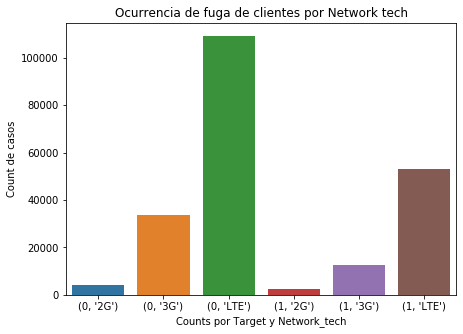

In [30]:
pivot_=pd.pivot_table(data=full3,
            index=['Target','NETWORK_TECH'],
            aggfunc=['size']
              )


plt.figure(figsize=(7,5))
ax = sns.barplot(x= pivot_.index, y="size", data=pivot_)

ax.set_ylabel('Count de casos')
ax.set_title('Ocurrencia de fuga de clientes por Network tech')              
ax.set_xlabel('Counts por Target y Network_tech')


Text(0.5, 51.0, 'Counts por Target y Network_tech')

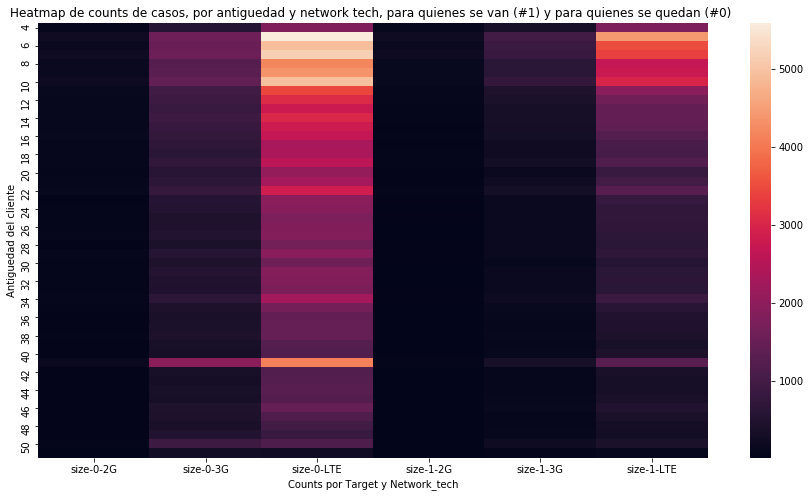

In [43]:
# Ocurrencia de clientes que se van y que se queda  en relaciòn a
# su antiguedad en el servicio y al tipo de red

pivot_=pd.pivot_table(data=full3,
            index=['TENURE_CUSTOMER'],
            columns=['Target','NETWORK_TECH'],
            aggfunc=['size']
              )


plt.figure(figsize=(15,8))
ax = sns.heatmap(data= pivot_)

ax.set_ylabel('Antiguedad del cliente')
ax.set_title('Heatmap de counts de casos, por antiguedad y network tech, para quienes se van (#1) y para quienes se quedan (#0) ')              
ax.set_xlabel('Counts por Target y Network_tech')

Text(0.5, 51.0, 'Counts por Target y Network_tech')

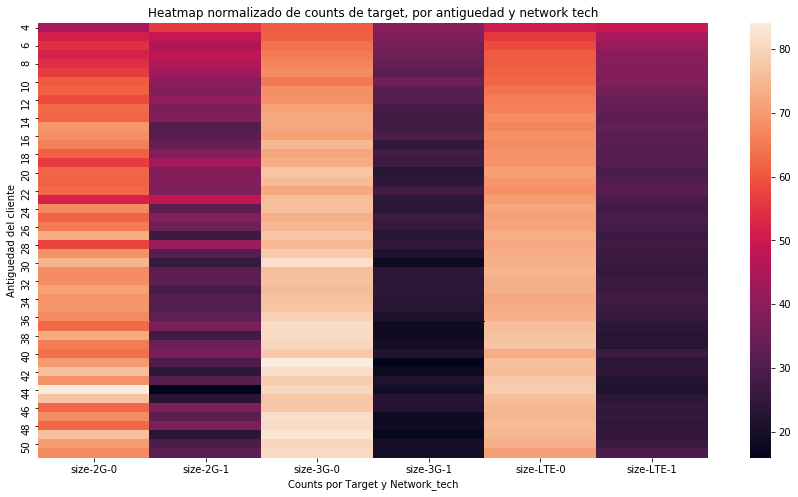

In [45]:
# Normalizamos para eliminar sesgo que ocurre por el numero de casos en cada fecha 

pivot_3=pd.pivot_table(data=full3,
            index=['TENURE_CUSTOMER'],
            columns=['NETWORK_TECH'],
            aggfunc=['size']
              )

pivot_a= (pivot_/pivot_3)*100


plt.figure(figsize=(15,8))
ax = sns.heatmap(data= pivot_a)

ax.set_ylabel('Antiguedad del cliente')
ax.set_title('Heatmap normalizado de counts de target, por antiguedad y network tech')              
           
ax.set_xlabel('Counts por Target y Network_tech')

Text(0.5, 51.0, 'Tipo de red y tipo de cliente')

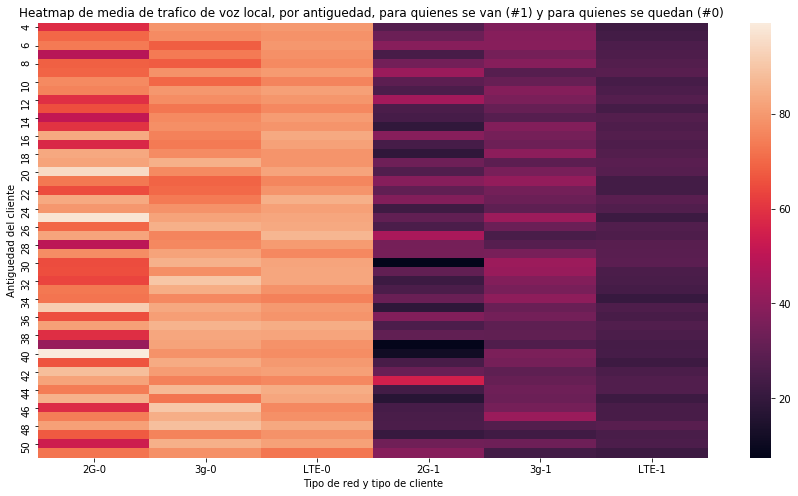

In [385]:
# A continuacion se crea una tabla pivot para estudiar el consumo medio de 
#trafico de voz local mensuales de quienes se van (#1),y quienes se quedan (#0))
# En relacion a su antiguedad en el servicio y al tipo de red que utilizan

pivot_dos = pd.pivot_table(data=full3,
               index=['TENURE_CUSTOMER'],
               values=['TRV_LCL_DUR_M1'],
                columns=['Target', 'NETWORK_TECH'],
               aggfunc=['mean']
              )

x_tick1 = ['2G-0','3g-0','LTE-0','2G-1','3g-1','LTE-1']

plt.figure(figsize=(15,8))
ax=sns.heatmap(data= pivot_dos, xticklabels= x_tick1)
ax.set_ylabel('Antiguedad del cliente')
ax.set_title('Heatmap de media de trafico de voz local, por antiguedad, para quienes se van (#1) y para quienes se quedan (#0) ')              
ax.set_xlabel('Tipo de red y tipo de cliente')


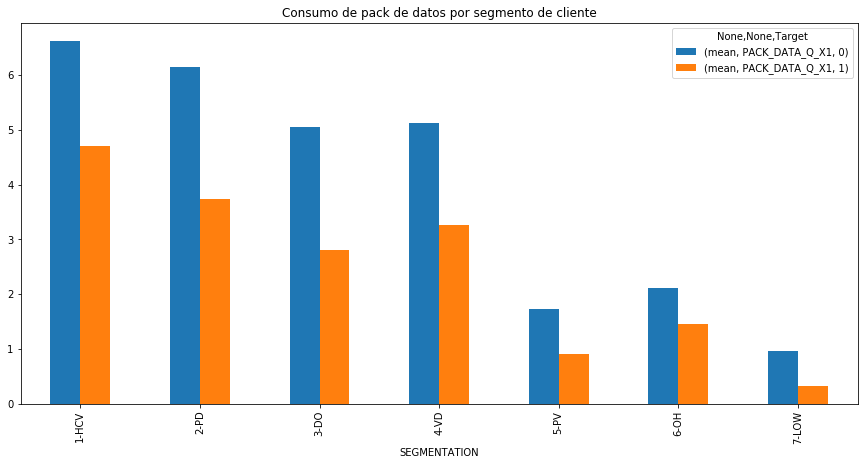

In [49]:
# El siguiente  barplot tienen como finalidad mostrar 
# la media de consumos de packs de datos en el mes 1, en relaciòn a la categoria Segmentation
# y a si se quedan #0 o se van #1


pivot_cinco = pd.pivot_table(data=full3,
               index=['SEGMENTATION'],
               values=['PACK_DATA_Q_X1',],
                columns=['Target'],
               aggfunc=['mean']
              )
pivot_cinco
pivot_cinco.plot(kind= 'bar', figsize= (15,7), title='Consumo de pack de datos por segmento de cliente')




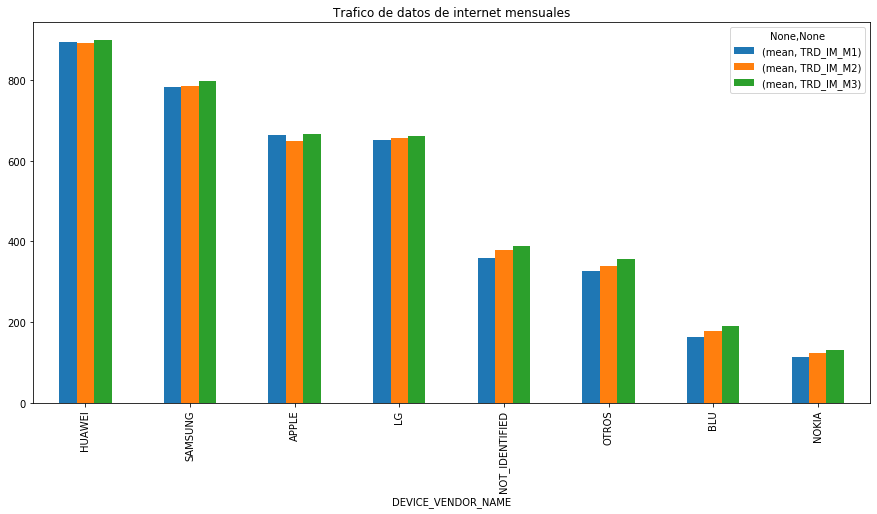

In [52]:
#El siguiente grafico tiene como objetivo estudiar el el trafico de datos de mensajes
#por internet, para cada mes y por marca de celular.



seis = pd.pivot_table(data=full3,
               index=['DEVICE_VENDOR_NAME'],
               values=['TRD_IM_M1','TRD_IM_M2','TRD_IM_M3'],
               aggfunc=['mean']
              )
seis.sort_values(('mean', 'TRD_IM_M1'), ascending=False).plot(kind='bar', \
                        figsize=(15,7),  title='Trafico de datos de internet mensuales')




### Armamos un nuevo df donde las variables originalmente divididas por meses(M1, M2, M3) se agrupen en una sola columna, y el mes se transforme en una variables categorica individual 

In [41]:
melted_2 = pd.read_csv('\home\juanfi\melt_final_7.csv')
melted_2.drop('Unnamed: 0', axis = 1, inplace=True)
melted_2.rename(columns={"SUSCRIBER_KEY_x": "SUSCRIBER_KEY"}, inplace=True)
melted_2

,TRD_IM,TRS_OFFNET_SMS,TRV_ONNET_DUR,TRV_OFFNET_DUR,TRV_LCL_DUR,PACK_DATA_Q,SUSCRIBER_KEY,Mes_x,PACK_DATA_AMT,PACK_VOICE_Q_
0,526,4.0,139.53,8.33,147.87,4.0,E_63734494_20190215,1,6.00,0.0
1,0,0.0,0.00,2.27,2.27,0.0,E_66977552_20190518,1,0.00,0.0
2,244,0.0,1.38,8.00,9.38,5.0,E_69159695_20180116,1,4.50,0.0
3,54,0.0,1.17,0.00,1.17,3.0,E_65255730_20190416,1,0.99,0.0
4,562,0.0,0.00,0.00,0.00,3.0,E_67893872_20161201,1,8.99,0.0
...,...,...,...,...,...,...,...,...,...,...
957661,34,0.0,1.12,2.32,3.43,4.0,E_66690182_20190121,3,4.99,0.0
957662,2041,0.0,177.43,14.67,192.10,7.0,E_65347728_20171017,3,10.48,7.0
957663,0,7.0,36.33,0.42,36.75,0.0,E_68063707_20150701,3,0.00,0.0
957664,913,4.0,25.93,18.17,40.67,3.0,E_67206080_20181010,3,5.00,0.0


In [33]:
col_sub1 = subset1.columns
col_sub1
subset1.columns

Index(['SUSCRIBER_KEY', 'LAT_PROV_BTS', 'LON_PROV_BTS', 'LAT_CITY_BTS',
       'LON_CITY_BTS', 'VALUE_SEGMENT', 'SEGMENTATION', 'MICROSEGMENTATION',
       'DEVICE_MODEL_NAME', 'DEVICE_VENDOR_NAME', 'NETWORK_TECH',
       'COMMERCIAL_ACTIVATION_DATE', 'TENURE_CUSTOMER', 'PREP_RECH_Q_EVT_X1',
       'PREP_RECH_Q_EVT_X2', 'PREP_RECH_Q_EVT_X3', 'PREP_RECH_AMT_X1',
       'PREP_RECH_AMT_X2', 'PREP_RECH_AMT_X3', 'PREP_RECH_Q_MON_12W',
       'PREP_RECH_Q_TUE_12W', 'PREP_RECH_Q_WEN_12W', 'PREP_RECH_Q_THUR_12W',
       'PREP_RECH_Q_FRI_12W', 'PREP_RECH_Q_SAT_12W', 'PREP_RECH_Q_SUN_12W',
       'PREP_RECH_LAST_DAY_12W', 'PREP_RECH_NDAYS_LASTRECH_12W',
       'PREP_RECH_CHNNL_MODE12W', 'PREP_RECH_Q_EVT_W1', 'PREP_RECH_Q_EVT_W2',
       'PREP_RECH_Q_EVT_W3', 'PREP_RECH_Q_EVT_W4', 'PREP_RECH_Q_EVT_W5',
       'PREP_RECH_Q_EVT_W6', 'PREP_RECH_Q_EVT_W7', 'PREP_RECH_Q_EVT_W8',
       'PREP_RECH_Q_EVT_W9', 'PREP_RECH_Q_EVT_W10', 'PREP_RECH_Q_EVT_W11',
       'PREP_RECH_Q_EVT_W12', 'PREP_RECH_AMT_W1',

In [29]:
#para_melt = subset1[['SUSCRIBER_KEY','PREP_RECH_Q_EVT_X1', 'PREP_RECH_Q_EVT_X2', 'PREP_RECH_Q_EVT_X3']]
    
#melt = pd.melt(para_melt, id_vars =['SUSCRIBER_KEY'], value_vars =['PREP_RECH_Q_EVT_X1',\
                                        #'PREP_RECH_Q_EVT_X2', 'PREP_RECH_Q_EVT_X3'],\
                  # var_name ='Mes', value_name ='PREP_RECH_Q_EVT')

#melt.columns = ['SUSCRIBER_KEY', 'Mes', 'PREP_RECH_Q_EVT']

#melt.loc[melt['Mes'] == 'PREP_RECH_Q_EVT_X1','Mes'] = 1
#melt.loc[melt['Mes'] == 'PREP_RECH_Q_EVT_X2','Mes'] = 2
#melt.loc[melt['Mes'] == 'PREP_RECH_Q_EVT_X3','Mes'] = 3

#para_melt1 = subset1[['SUSCRIBER_KEY','PREP_RECH_AMT_X1','PREP_RECH_AMT_X2', 'PREP_RECH_AMT_X3']]
    
#melt1 = pd.melt(para_melt1, id_vars =['SUSCRIBER_KEY'], value_vars =['PREP_RECH_AMT_X1',\
#                                        'PREP_RECH_AMT_X2', 'PREP_RECH_AMT_X3'],\
#                   var_name ='Mes', value_name ='PREP_RECH_AMT')

#melt1.columns = ['SUSCRIBER_KEY', 'Mes', 'PREP_RECH_AMT']

#melt1.loc[melt1['Mes'] == 'PREP_RECH_AMT_X1','Mes'] = 1
#melt1.loc[melt1['Mes'] == 'PREP_RECH_AMT_X2','Mes'] = 2
#melt1.loc[melt1['Mes'] == 'PREP_RECH_AMT_X3','Mes'] = 3

#para_melt2 = subset1[['SUSCRIBER_KEY','TRD_M1', 'TRD_M2', 'TRD_M3']]
    
#melt2 = pd.melt(para_melt2, id_vars =['SUSCRIBER_KEY'], value_vars =['TRD_M1',\
 #                                       'TRD_M2', 'TRD_M3'],
  #                 var_name ='Mes', value_name ='TRD')

#melt2.columns = ['SUSCRIBER_KEY', 'Mes', 'TRD']

#melt2.loc[melt2['Mes'] == 'TRD_M1','Mes'] = 1
#melt2.loc[melt2['Mes'] == 'TRD_M2','Mes'] = 2
#melt2.loc[melt2['Mes'] == 'TRD_M3','Mes'] = 3

#para_melt3 = subset1[['SUSCRIBER_KEY','TRD_STR_M1','TRD_STR_M2', 'TRD_STR_M3']]
    
#melt3 = pd.melt(para_melt3, id_vars =['SUSCRIBER_KEY'], value_vars =['TRD_STR_M1',\
 #                                     'TRD_STR_M2', 'TRD_STR_M3'],
  #              var_name ='Mes', value_name ='TRD_STR')

#melt3.columns = ['SUSCRIBER_KEY', 'Mes', 'TRD_STR']

#melt3.loc[melt3['Mes'] == 'TRD_STR_M1','Mes'] = 1
#melt3.loc[melt3['Mes'] == 'TRD_STR_M2','Mes'] = 2
#melt3.loc[melt3['Mes'] == 'TRD_STR_M3','Mes'] = 3

#para_melt4 = subset1[['SUSCRIBER_KEY','TRD_SN_M1', 'TRD_SN_M2', 'TRD_SN_M3']]
    
#melt4 = pd.melt(para_melt4, id_vars =['SUSCRIBER_KEY'], value_vars =['TRD_SN_M1',\
 #                                     'TRD_SN_M2', 'TRD_SN_M3'],
 #               var_name ='Mes', value_name ='TRD_SN')

#melt4.columns = ['SUSCRIBER_KEY', 'Mes', 'TRD_SN']

#melt4.loc[melt4['Mes'] == 'TRD_SN_M1','Mes'] = 1
#melt4.loc[melt4['Mes'] == 'TRD_SN_M2','Mes'] = 2
#melt4.loc[melt4['Mes'] == 'TRD_SN_M3','Mes'] = 3

#melta = pd.merge(melt, melt1, right_index=True,left_index=True)

#(melta.Mes_x == melta.Mes_y).value_counts()
#(melta.SUSCRIBER_KEY_x == melta.SUSCRIBER_KEY_y).value_counts()

#melta.drop('SUSCRIBER_KEY_y', axis = 1, inplace = True)
#melta.drop('Mes_y', axis = 1, inplace = True)

#meltb = pd.merge(melta, melt2, right_index=True,left_index=True)

#(meltb.Mes_x == meltb.Mes_x).value_counts()
#(meltb.SUSCRIBER_KEY_x == meltb.SUSCRIBER_KEY).value_counts()

#meltb.drop('SUSCRIBER_KEY_x', axis = 1, inplace = True)
#meltb.drop('Mes_x', axis = 1, inplace = True)
#meltb

#meltc = pd.merge(meltb, melt3, right_index=True,left_index=True)

#(meltc.Mes_x == meltc.Mes_y).value_counts()
#(meltc.SUSCRIBER_KEY_x == meltc.SUSCRIBER_KEY_y).value_counts()

#meltc.drop('SUSCRIBER_KEY_x', axis = 1, inplace = True)
#meltc.drop('Mes_x', axis = 1, inplace = True)
#meltc

#meltd = pd.merge(meltc, melt4, right_index=True,left_index=True)

#(meltd.Mes == meltd.Mes_y).value_counts()
#(meltd.SUSCRIBER_KEY == meltd.SUSCRIBER_KEY_y).value_counts()

#meltd.drop('SUSCRIBER_KEY_y', axis = 1, inplace = True)
#meltd.drop('Mes_y', axis = 1, inplace = True)


In [108]:
result= pd.merge(melted_2,meltd, right_index=True,left_index=True)
#result.drop('Mes_x', axis = 1, inplace = True)
result.columns
result.drop('SUSCRIBER_KEY_y', axis = 1, inplace = True)
result.drop('Mes_x', axis = 1, inplace = True)
result.duplicated().any()
result.rename(columns={"SUSCRIBER_KEY_x": "SUSCRIBER_KEY"}, inplace=True)
#result.drop_duplicates().shape

In [122]:
#result1 = pd.merge(result, datos_con_target[['Target','SUSCRIBER_KEY']], on= 'SUSCRIBER_KEY')
result2 = pd.merge(result1, subset1[['SUSCRIBER_KEY', 'LAT_PROV_BTS', 'LON_PROV_BTS', 'LAT_CITY_BTS'\
                                    ,'LON_CITY_BTS', 'VALUE_SEGMENT', 'SEGMENTATION', 'MICROSEGMENTATION'\
                                    ,'DEVICE_MODEL_NAME', 'DEVICE_VENDOR_NAME', 'NETWORK_TECH',\
                    'COMMERCIAL_ACTIVATION_DATE', 'TENURE_CUSTOMER']], on= 'SUSCRIBER_KEY', how='left')
result2

,TRD_IM,TRS_OFFNET_SMS,TRV_ONNET_DUR,TRV_OFFNET_DUR,TRV_LCL_DUR,PACK_DATA_Q,SUSCRIBER_KEY,PACK_DATA_AMT,PACK_VOICE_Q_,PREP_RECH_Q_EVT,...,LAT_CITY_BTS,LON_CITY_BTS,VALUE_SEGMENT,SEGMENTATION,MICROSEGMENTATION,DEVICE_MODEL_NAME,DEVICE_VENDOR_NAME,NETWORK_TECH,COMMERCIAL_ACTIVATION_DATE,TENURE_CUSTOMER
0,526,4.0,139.53,8.33,147.87,4.0,E_63734494_20190215,6.0,0.0,6,...,-82.43330,8.4333,3.0,2-PD,PD1,OTROS,LG,LTE,2019-02-15,8.0
1,435,0.0,188.60,21.95,210.55,5.0,E_63734494_20190215,9.0,0.0,0,...,-82.43330,8.4333,3.0,2-PD,PD1,OTROS,LG,LTE,2019-02-15,8.0
2,0,0.0,1.67,1.13,2.80,4.0,E_63734494_20190215,6.0,0.0,8,...,-82.43330,8.4333,3.0,2-PD,PD1,OTROS,LG,LTE,2019-02-15,8.0
3,0,0.0,0.00,2.27,2.27,0.0,E_66977552_20190518,0.0,0.0,0,...,-82.43330,8.4333,4.0,7-LOW,LOW3,NOT_IDENTIFIED,NOT_IDENTIFIED,LTE,2019-05-18,5.0
4,0,0.0,0.00,4.12,4.12,0.0,E_66977552_20190518,0.0,0.0,0,...,-82.43330,8.4333,4.0,7-LOW,LOW3,NOT_IDENTIFIED,NOT_IDENTIFIED,LTE,2019-05-18,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904282,0,4.0,28.77,1.07,29.83,0.0,E_68063707_20150701,0.0,3.0,0,...,-79.65000,8.9500,3.0,6-OH,OH2,OTROS,SAMSUNG,LTE,2015-07-01,52.0
904283,0,0.0,0.00,0.00,0.00,0.0,E_67206080_20181010,0.0,0.0,4,...,-77.67270,8.1393,4.0,7-LOW,VD1,Y9 2019 (JKM-LX3),HUAWEI,LTE,2018-10-10,12.0
904284,0,0.0,0.00,0.00,0.00,0.0,E_67206080_20181010,0.0,0.0,0,...,-77.67270,8.1393,4.0,7-LOW,VD1,Y9 2019 (JKM-LX3),HUAWEI,LTE,2018-10-10,12.0
904285,4,5.0,0.00,0.00,0.00,5.0,E_67580341_20150814,18.0,0.0,5,...,-79.51973,8.9936,2.0,6-OH,OH4,OTROS,OTROS,LTE,2015-08-14,50.0


In [32]:
result2 =  pd.read_csv(r'\home\juanfi\df_para_graficar.csv')

In [33]:
result2 = pd.read_csv('\home\juanfi\df_para_graficar.csv')

In [34]:
result2

,Unnamed: 0,TRD_IM,TRS_OFFNET_SMS,TRV_ONNET_DUR,TRV_OFFNET_DUR,TRV_LCL_DUR,PACK_DATA_Q,SUSCRIBER_KEY,PACK_DATA_AMT,PACK_VOICE_Q_,PREP_RECH_Q_EVT,PREP_RECH_AMT,TRD,TRD_STR,Mes,TRD_SN,Target,LAT_PROV_BTS,LON_PROV_BTS,LAT_CITY_BTS,LON_CITY_BTS,VALUE_SEGMENT,SEGMENTATION,MICROSEGMENTATION,DEVICE_MODEL_NAME,DEVICE_VENDOR_NAME,NETWORK_TECH,COMMERCIAL_ACTIVATION_DATE,TENURE_CUSTOMER
0,0,526,4.000,139.530,8.330,147.870,4.000,E_63734494_20190215,6.000,0.000,6,8.500,15.090,12538.000,1,0.000,1,8.585,-82.388,-82.433,8.433,3.000,2-PD,PD1,OTROS,LG,LTE,2019-02-15,8.000
1,1,435,0.000,188.600,21.950,210.550,5.000,E_63734494_20190215,9.000,0.000,0,0.000,0.000,0.000,2,0.000,1,8.585,-82.388,-82.433,8.433,3.000,2-PD,PD1,OTROS,LG,LTE,2019-02-15,8.000
2,2,0,0.000,1.670,1.130,2.800,4.000,E_63734494_20190215,6.000,0.000,8,18.000,12.800,4366.000,3,1039.000,1,8.585,-82.388,-82.433,8.433,3.000,2-PD,PD1,OTROS,LG,LTE,2019-02-15,8.000
3,3,0,0.000,0.000,2.270,2.270,0.000,E_66977552_20190518,0.000,0.000,0,0.000,0.000,0.000,1,0.000,1,8.585,-82.388,-82.433,8.433,4.000,7-LOW,LOW3,NOT_IDENTIFIED,NOT_IDENTIFIED,LTE,2019-05-18,5.000
4,4,0,0.000,0.000,4.120,4.120,0.000,E_66977552_20190518,0.000,0.000,0,0.000,0.000,0.000,2,0.000,1,8.585,-82.388,-82.433,8.433,4.000,7-LOW,LOW3,NOT_IDENTIFIED,NOT_IDENTIFIED,LTE,2019-05-18,5.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904282,904282,0,4.000,28.770,1.070,29.830,0.000,E_68063707_20150701,0.000,3.000,0,0.000,0.000,0.000,3,0.000,0,8.795,-80.147,-79.650,8.950,3.000,6-OH,OH2,OTROS,SAMSUNG,LTE,2015-07-01,52.000
904283,904283,0,0.000,0.000,0.000,0.000,0.000,E_67206080_20181010,0.000,0.000,4,8.000,23.610,4059.000,2,13252.000,1,7.868,-77.837,-77.673,8.139,4.000,7-LOW,VD1,Y9 2019 (JKM-LX3),HUAWEI,LTE,2018-10-10,12.000
904284,904284,0,0.000,0.000,0.000,0.000,0.000,E_67206080_20181010,0.000,0.000,0,0.000,0.000,0.000,3,0.000,1,7.868,-77.837,-77.673,8.139,4.000,7-LOW,VD1,Y9 2019 (JKM-LX3),HUAWEI,LTE,2018-10-10,12.000
904285,904285,4,5.000,0.000,0.000,0.000,5.000,E_67580341_20150814,18.000,0.000,5,9.500,5.060,1179.000,2,690.000,0,9.083,-79.592,-79.520,8.994,2.000,6-OH,OH4,OTROS,OTROS,LTE,2015-08-14,50.000


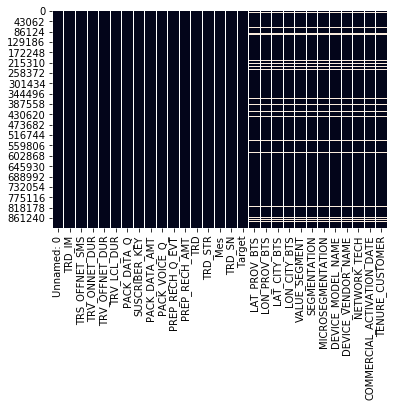

In [35]:
sns.heatmap(result2[result2.columns[0:]].isnull(), cbar=False)

In [36]:

result2.shape
result2.dropna(subset=['LAT_PROV_BTS','LON_PROV_BTS', 'LAT_CITY_BTS', 'LON_CITY_BTS', 'VALUE_SEGMENT',\
                  'SEGMENTATION', 'MICROSEGMENTATION', 'DEVICE_MODEL_NAME',\
                  'DEVICE_VENDOR_NAME', 'NETWORK_TECH', 'COMMERCIAL_ACTIVATION_DATE','TENURE_CUSTOMER'],inplace=True)



result2.shape

(853880, 29)

In [37]:
result2['COMMERCIAL_ACTIVATION_DATE'] = result2['COMMERCIAL_ACTIVATION_DATE'].apply(pd.to_datetime)

In [38]:
result2_sample = result2.sample(frac=0.1, replace=True, random_state=1)
result2_sample

,Unnamed: 0,TRD_IM,TRS_OFFNET_SMS,TRV_ONNET_DUR,TRV_OFFNET_DUR,TRV_LCL_DUR,PACK_DATA_Q,SUSCRIBER_KEY,PACK_DATA_AMT,PACK_VOICE_Q_,PREP_RECH_Q_EVT,PREP_RECH_AMT,TRD,TRD_STR,Mes,TRD_SN,Target,LAT_PROV_BTS,LON_PROV_BTS,LAT_CITY_BTS,LON_CITY_BTS,VALUE_SEGMENT,SEGMENTATION,MICROSEGMENTATION,DEVICE_MODEL_NAME,DEVICE_VENDOR_NAME,NETWORK_TECH,COMMERCIAL_ACTIVATION_DATE,TENURE_CUSTOMER
135792,135792,3323,4.000,198.000,30.370,228.370,9.000,E_67562789_20170311,27.420,0.000,5,9.000,0.000,0.000,1,0.000,0,8.795,-80.147,-79.783,8.880,1.000,1-HCV,HCV4,Y5 2018 (DRA-LX3),HUAWEI,LTE,2017-03-11,31.000
520798,520798,35,0.000,5.480,28.480,33.970,0.000,E_67301010_20150602,0.000,0.000,6,10.500,0.000,0.000,2,0.000,0,8.585,-82.388,-82.433,8.433,4.000,7-LOW,OH2,GALAXY GRAND NEO (GT-I9060C),SAMSUNG,LTE,2015-06-02,53.000
498710,498710,424,6.000,169.480,7.000,176.480,4.000,E_66621668_20180610,4.980,0.000,6,12.500,0.000,0.000,3,0.000,0,8.585,-82.388,-82.620,8.483,3.000,4-VD,OH3,NOT_IDENTIFIED,NOT_IDENTIFIED,3G,2018-06-10,16.000
838421,838421,0,0.000,0.000,0.000,0.000,3.000,E_67902390_20190117,4.980,0.000,0,0.000,0.000,0.000,1,0.000,0,8.795,-80.147,-79.783,8.880,4.000,7-LOW,LOW3,GALAXY GRAND NEO (GT-I9060C),SAMSUNG,3G,2019-01-17,9.000
520282,520282,53,0.000,149.080,1.280,150.370,6.000,E_68849193_20161006,12.000,0.000,7,15.500,0.070,4.000,2,0.000,0,8.627,-80.366,-80.357,8.519,3.000,7-LOW,OH3,OTROS,SAMSUNG,3G,2016-10-06,37.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36553,36553,3432,5.000,77.620,36.600,114.220,4.000,E_67799726_20150602,8.000,0.000,3,2.000,0.200,0.000,2,3.000,0,8.795,-80.147,-79.883,8.583,2.000,2-PD,PD1,OTROS,SAMSUNG,3G,2015-06-02,53.000
568872,568872,0,0.000,4.530,0.000,4.530,0.000,E_69601649_20190421,0.000,0.000,4,18.000,2.440,0.000,1,0.000,0,9.083,-79.592,-79.520,8.994,3.000,7-LOW,LOW4,OTROS,SAMSUNG,LTE,2019-04-21,6.000
640378,640378,4565,0.000,291.920,0.000,291.920,3.000,E_67019689_20190129,5.000,0.000,8,21.500,14.720,8185.000,2,0.000,0,8.795,-80.147,-79.650,8.950,2.000,2-PD,HCV1,OTROS,HUAWEI,LTE,2019-01-29,9.000
815208,815208,1409,4.000,4.900,11.800,16.700,6.000,E_66831621_20190408,9.500,5.000,0,0.000,0.000,0.000,2,0.000,0,9.083,-79.592,-79.520,8.994,2.000,3-DO,DO4,GALAXY GRAND PRIME DUOS (SM-G532M DS),SAMSUNG,LTE,2019-04-08,7.000


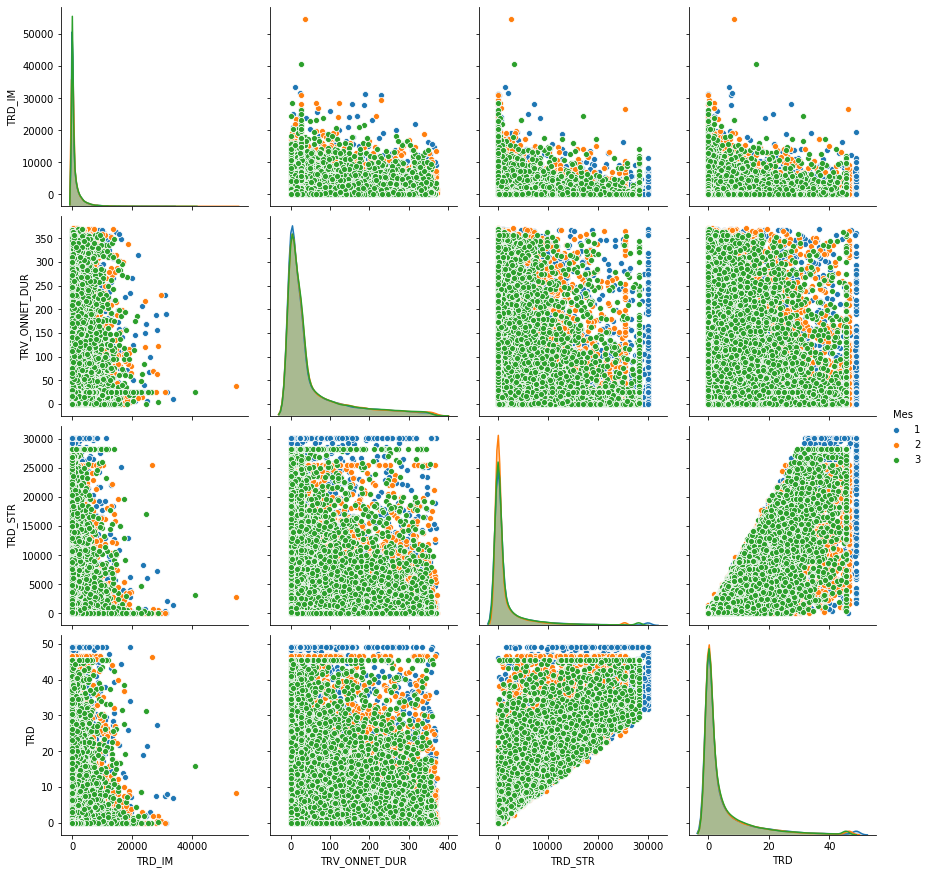

In [39]:
# El siguiente pairplot tiene como finalidad explorar el comportamiento conjunto de 
#las variables de consumo de datos, divididas por los 3 meses de registros 


g = sns.pairplot(result2_sample, height=3,
                 vars=['TRD_IM','TRV_ONNET_DUR', \
                       'TRD_STR', 'TRD'], hue= 'Mes')

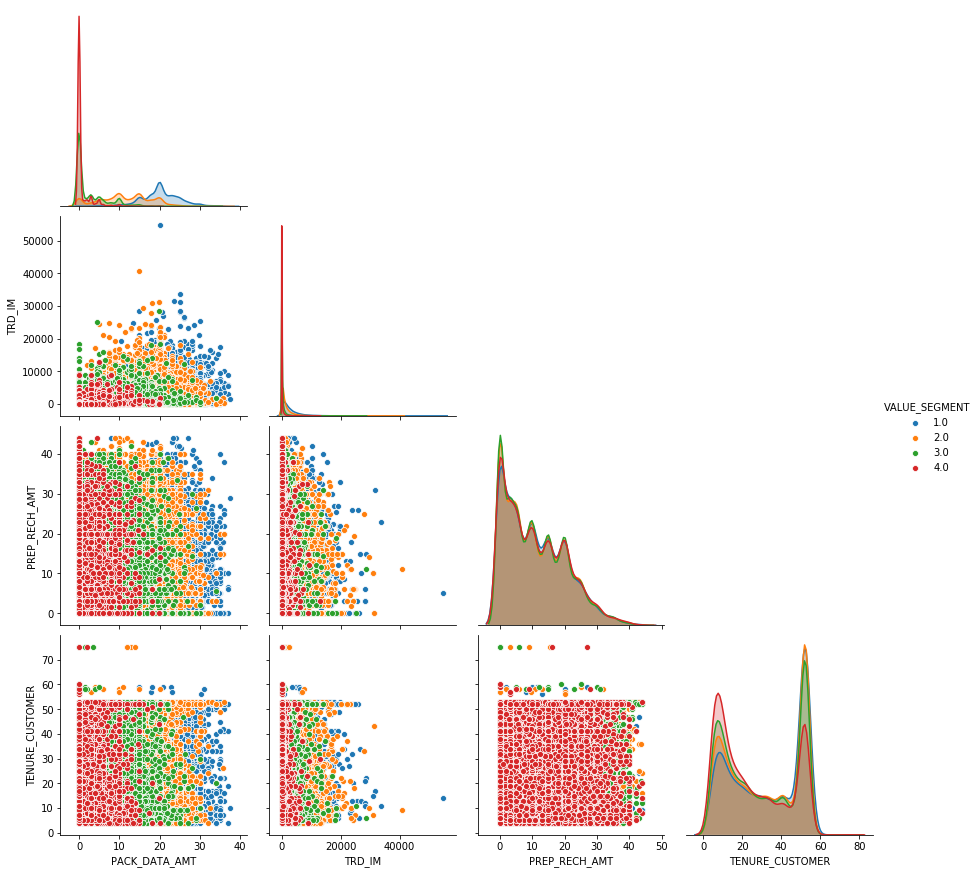

In [44]:
# El siguiente pairplot tiene como finalidad explorar el comportamiento conjunto de 
#las variables de gastos en paquetes de datos y consumo de datos
# divididas por el segmento de cliente 



sns.pairplot(result2_sample, height=3,
                 vars=['PACK_DATA_AMT', 'TRD_IM',\
                       'PREP_RECH_AMT', 'TENURE_CUSTOMER'], hue= 'VALUE_SEGMENT',corner = True)


A continuacion se realizaran varios de estos graficos como recurso para estudiar la interaccion entre las diferentes variables del dataset 

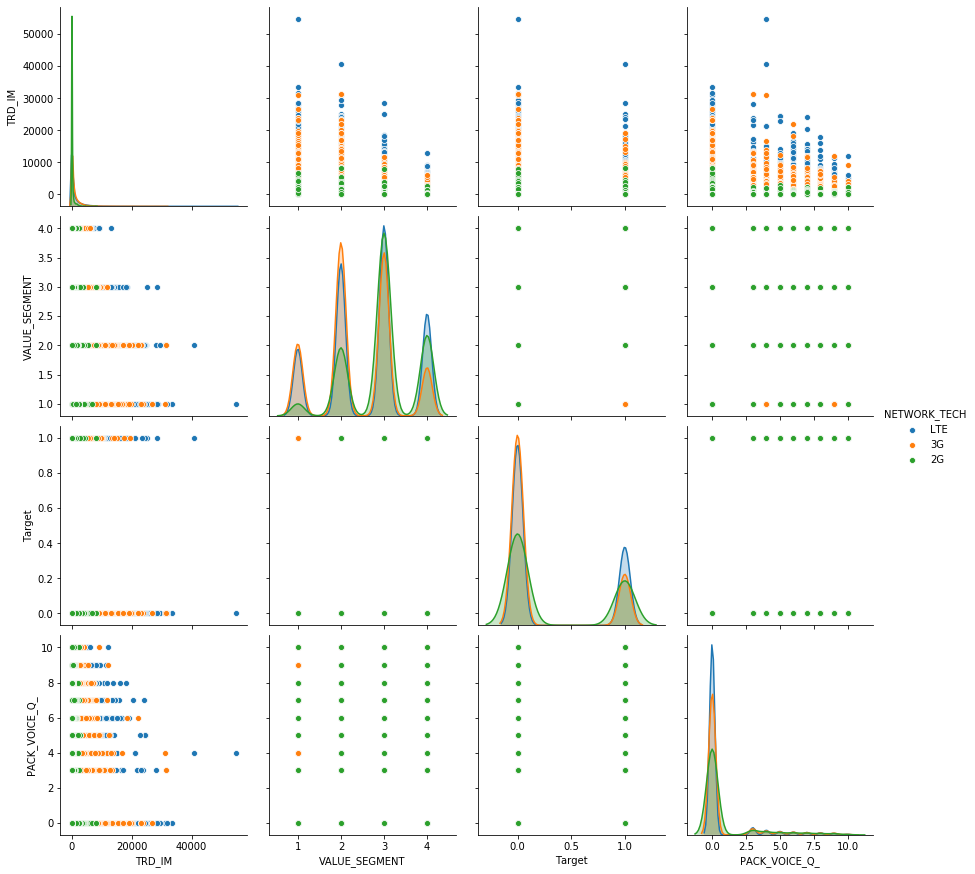

In [23]:
sns.pairplot(result2_sample, height=3,
                 vars=[ 'TRD_IM', 'VALUE_SEGMENT',\
                       'Target', 'PACK_VOICE_Q_'], hue= 'NETWORK_TECH')

In [24]:
result2_sample.columns

Index(['Unnamed: 0', 'TRD_IM', 'TRS_OFFNET_SMS', 'TRV_ONNET_DUR', 'TRV_OFFNET_DUR', 'TRV_LCL_DUR', 'PACK_DATA_Q', 'SUSCRIBER_KEY', 'PACK_DATA_AMT', 'PACK_VOICE_Q_', 'PREP_RECH_Q_EVT', 'PREP_RECH_AMT', 'TRD', 'TRD_STR', 'Mes', 'TRD_SN', 'Target', 'LAT_PROV_BTS', 'LON_PROV_BTS', 'LAT_CITY_BTS', 'LON_CITY_BTS', 'VALUE_SEGMENT', 'SEGMENTATION', 'MICROSEGMENTATION', 'DEVICE_MODEL_NAME', 'DEVICE_VENDOR_NAME', 'NETWORK_TECH', 'COMMERCIAL_ACTIVATION_DATE', 'TENURE_CUSTOMER'], dtype='object')

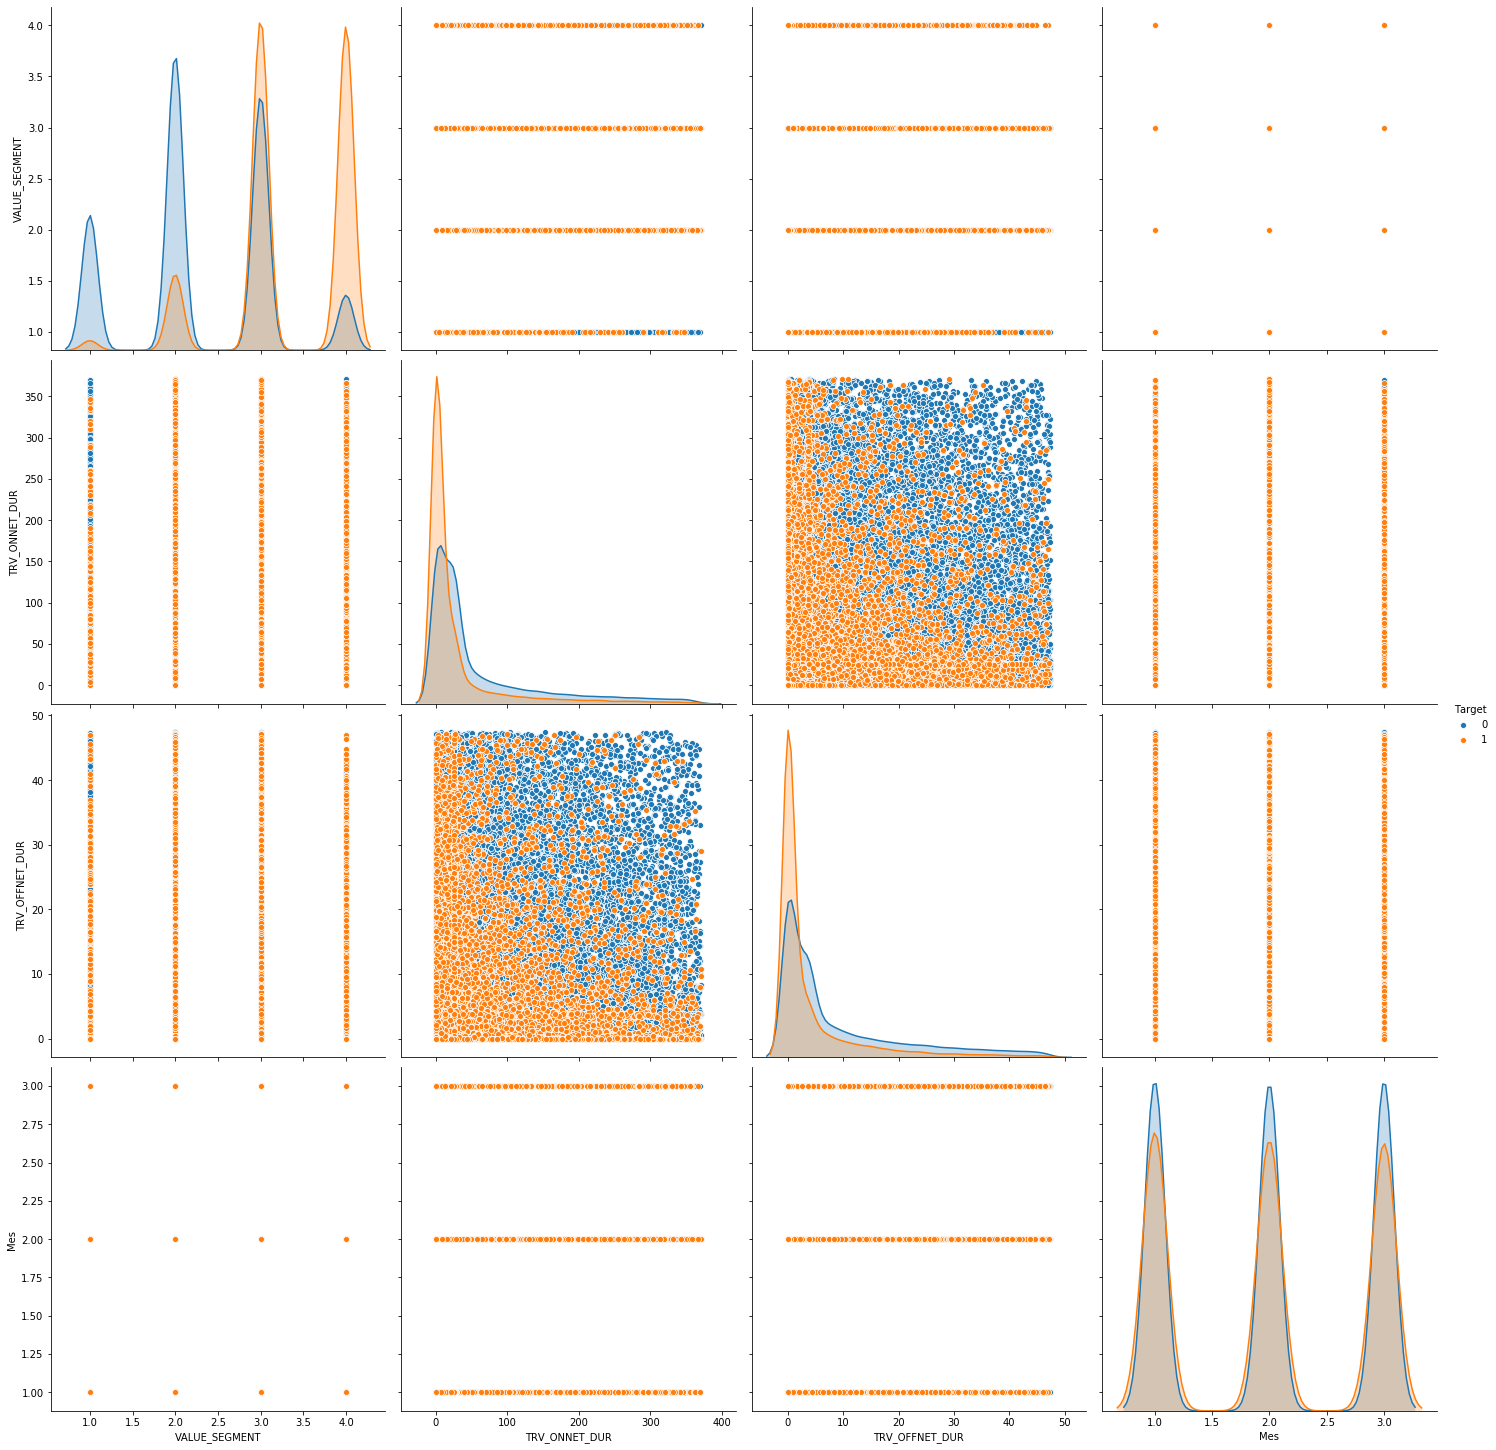

In [25]:


sns.pairplot(result2_sample, height=5,
                 vars=[ 'VALUE_SEGMENT', 'TRV_ONNET_DUR',\
                       'TRV_OFFNET_DUR', 'Mes'], hue= 'Target')

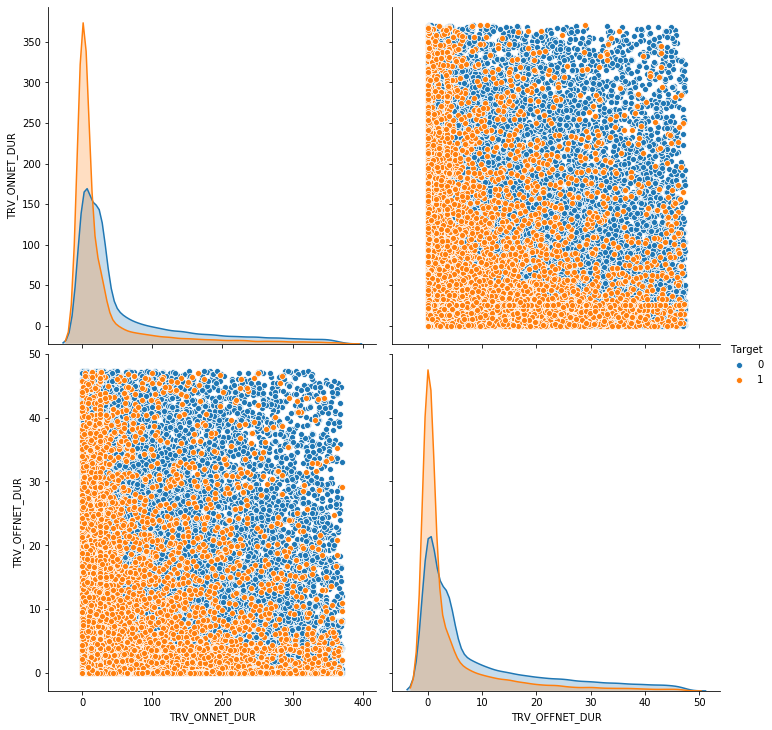

In [26]:
sns.pairplot(result2_sample, height=5,
                 vars=[ 'TRV_ONNET_DUR',\
                       'TRV_OFFNET_DUR'], hue= 'Target')


In [27]:
import matplotlib.pyplot as plt

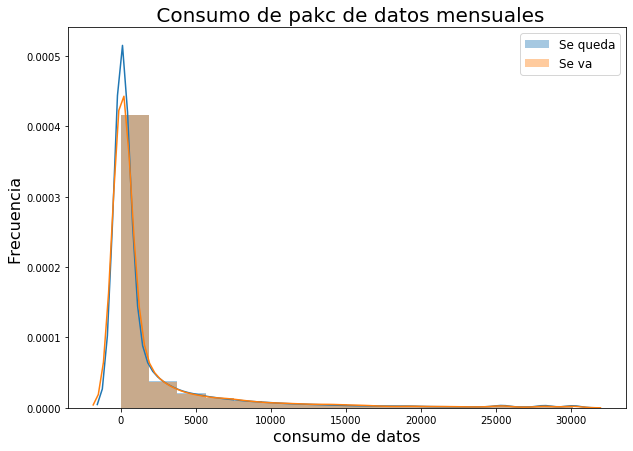

In [28]:
fig = plt.figure(figsize = (10,7))

sns.distplot(result2_sample.loc[result2_sample['Target']==0,'TRD_STR'], bins= 16, label='Se queda')
sns.distplot(result2_sample.loc[result2_sample['Target']==1,'TRD_STR'], bins = 16,  label='Se va')
plt.title(' Consumo de pakc de datos mensuales', fontsize=20)
plt.xlabel('consumo de datos', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
plt.legend(prop={'size': 12})



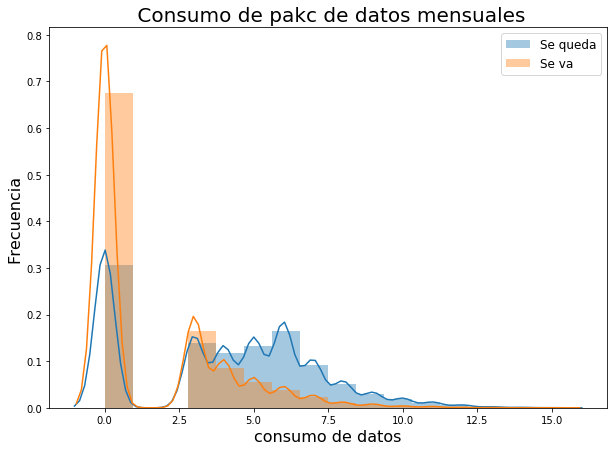

In [29]:
fig = plt.figure(figsize = (10,7))

sns.distplot(result2_sample.loc[result2_sample['Target']==0,'PACK_DATA_Q'], bins= 16, label='Se queda')
sns.distplot(result2_sample.loc[result2_sample['Target']==1,'PACK_DATA_Q'], bins = 16,  label='Se va')
plt.title(' Consumo de pakc de datos mensuales', fontsize=20)
plt.xlabel('consumo de datos', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
plt.legend(prop={'size': 12})



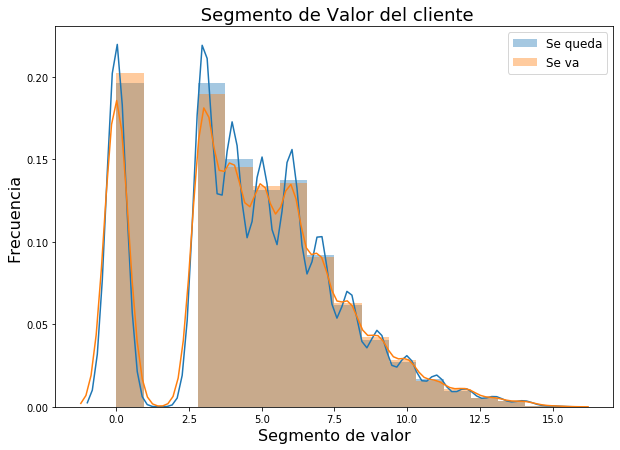

In [30]:
fig = plt.figure(figsize = (10,7))

sns.distplot(result2_sample.loc[result2_sample['Target']==0,'PREP_RECH_Q_EVT'], bins= 16, label='Se queda')
sns.distplot(result2_sample.loc[result2_sample['Target']==1,'PREP_RECH_Q_EVT'], bins = 16,  label='Se va')
plt.title(' Segmento de Valor del cliente', fontsize=18)
plt.xlabel('Segmento de valor', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
plt.legend(prop={'size': 12})

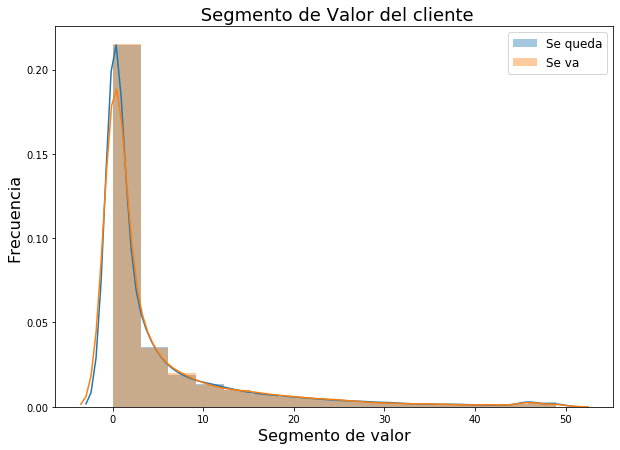

In [31]:
fig = plt.figure(figsize = (10,7))

sns.distplot(result2_sample.loc[result2_sample['Target']==0,'TRD'], bins= 16, label='Se queda')
sns.distplot(result2_sample.loc[result2_sample['Target']==1,'TRD'], bins = 16,  label='Se va')
plt.title(' Segmento de Valor del cliente', fontsize=18)
plt.xlabel('Segmento de valor', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
plt.legend(prop={'size': 12})


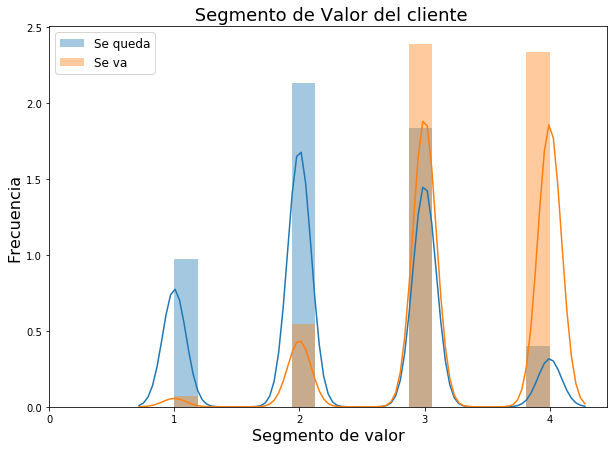

In [37]:
fig = plt.figure(figsize = (10,7))

sns.distplot(result2_sample.loc[result2_sample['Target']==0,'VALUE_SEGMENT'], bins= 16, label='Se queda')
sns.distplot(result2_sample.loc[result2_sample['Target']==1,'VALUE_SEGMENT'], bins = 16,  label='Se va')
plt.title(' Segmento de Valor del cliente', fontsize=18)
plt.xlabel('Segmento de valor', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
plt.xticks(np.arange(5), ('0','1', '2', '3', '4'))
plt.legend(prop={'size': 12})


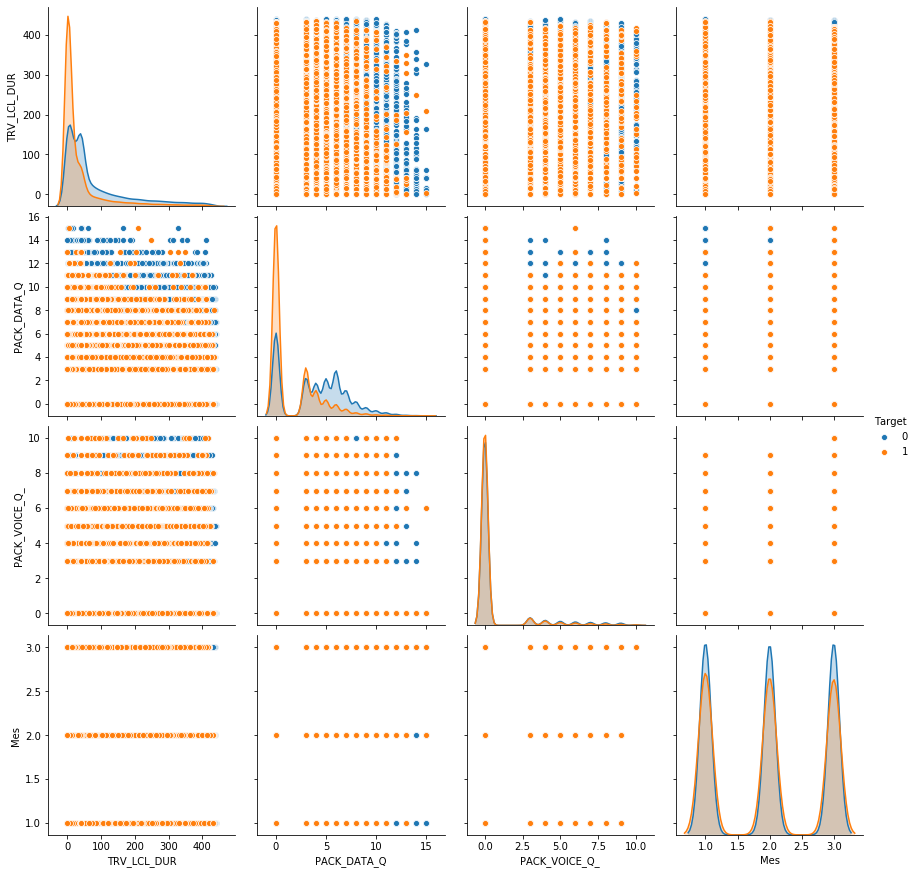

In [37]:
sns.pairplot(result2_sample, height=3,
                 vars=[ 'TRV_LCL_DUR', 'PACK_DATA_Q',\
                       'PACK_VOICE_Q_', 'Mes'], hue= 'Target')

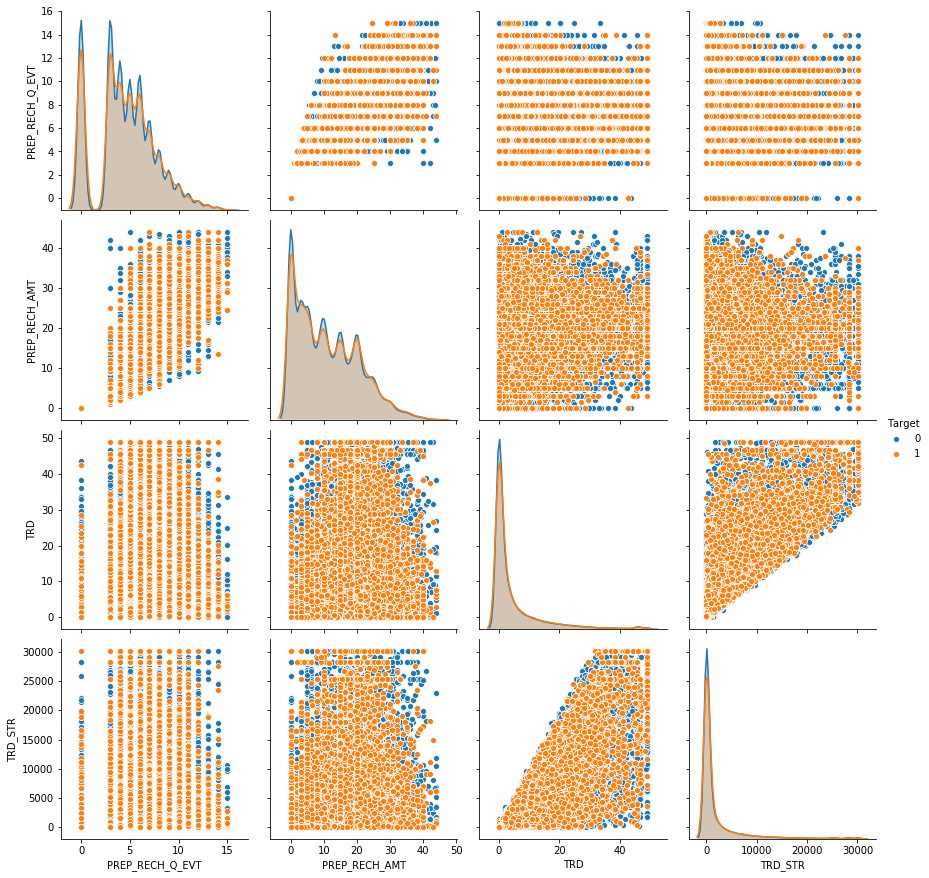

In [38]:
sns.pairplot(result2_sample, height=3,
                 vars=[ 'PREP_RECH_Q_EVT', 'PREP_RECH_AMT',\
                       'TRD', 'TRD_STR'], hue= 'Target')

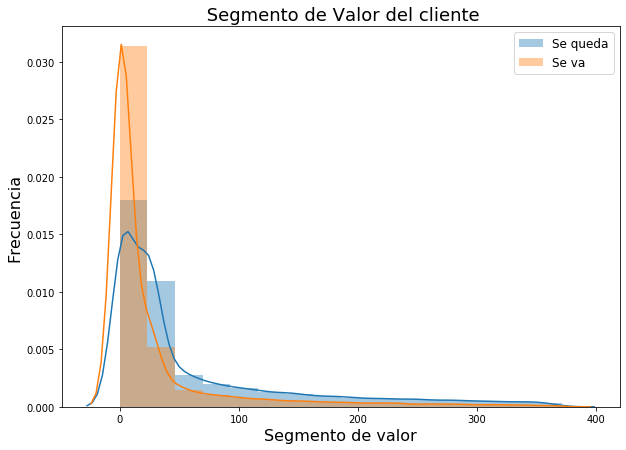

In [78]:
fig = plt.figure(figsize = (10,7))

sns.distplot(result2_sample.loc[result2_sample['Target']==0,'TRV_ONNET_DUR'], bins= 16, label='Se queda')
sns.distplot(result2_sample.loc[result2_sample['Target']==1,'TRV_ONNET_DUR'], bins = 16,  label='Se va')
plt.title(' Segmento de Valor del cliente', fontsize=18)
plt.xlabel('Segmento de valor', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
plt.legend(prop={'size': 12})
